## Метрики моделей классификации 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 

##### Визуал контейнера ###
# from sklearn import set_config
# set_config(display="diagram")


import sklearn
#pip install --upgrade scikit-learn
sklearn.__version__


'1.4.2'

In [3]:
#pip install --upgrade scikit-learn

**Загрузим данные и сделаем задачу бинарной классификации**

In [5]:
# iris = load_iris()
# X = iris.data
# y = np.where(iris.target==1,1,0)


from sklearn.datasets import fetch_openml
X, y_cat = fetch_openml(data_id=1464, return_X_y=True, parser='auto')
y = [0 if i =='1' else 1 for i in y_cat]
X

,V1,V2,V3,V4
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [6]:
X.describe()

,V1,V2,V3,V4
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086
std,8.095396,5.839307,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,2.750000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [7]:
np.array(y).mean()

0.23796791443850268

Сплитуем данные и отложим тестовый набор. Так как данных мало стратифицируем.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                     test_size=0.3, stratify=y)

In [10]:
print(np.mean(y_train), np.mean(y_test))

0.23709369024856597 0.24


In [11]:
len(y_test)

225

## Построим три конвеера для построени трех алгоритмов

Сравним их между собой, целью визуализации метрик. 

In [13]:
pipe_1 = make_pipeline(Normalizer(),     KNeighborsClassifier(n_neighbors = 24, p=1))
pipe_2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 12, p=6, weights = 'distance'))
pipe_3 = make_pipeline(RobustScaler(),   KNeighborsClassifier(n_neighbors =  1, p=3, weights = 'distance'))

pipe_1.fit(X_train,y_train)
pipe_2.fit(X_train,y_train)
pipe_3.fit(X_train,y_train)

y_pred_1 = pipe_1.predict(X_test)
y_pred_2 = pipe_2.predict(X_test)
y_pred_3 = pipe_3.predict(X_test)

print("По умолчанию мерикa accuracy")
print("Тренировака: ", pipe_1.score(X_train,y_train), "   Тест : ", pipe_1.score(X_test,y_test))
print("Тренировака: ", pipe_2.score(X_train,y_train), "   Тест : ", pipe_2.score(X_test,y_test))
print("Тренировака: ", pipe_3.score(X_train,y_train), "   Тест : ", pipe_3.score(X_test,y_test))

По умолчанию мерикa accuracy
Тренировака:  0.8049713193116634    Тест :  0.7866666666666666
Тренировака:  0.9445506692160612    Тест :  0.7733333333333333
Тренировака:  0.9196940726577438    Тест :  0.6488888888888888


## Построим матрицы ошибок

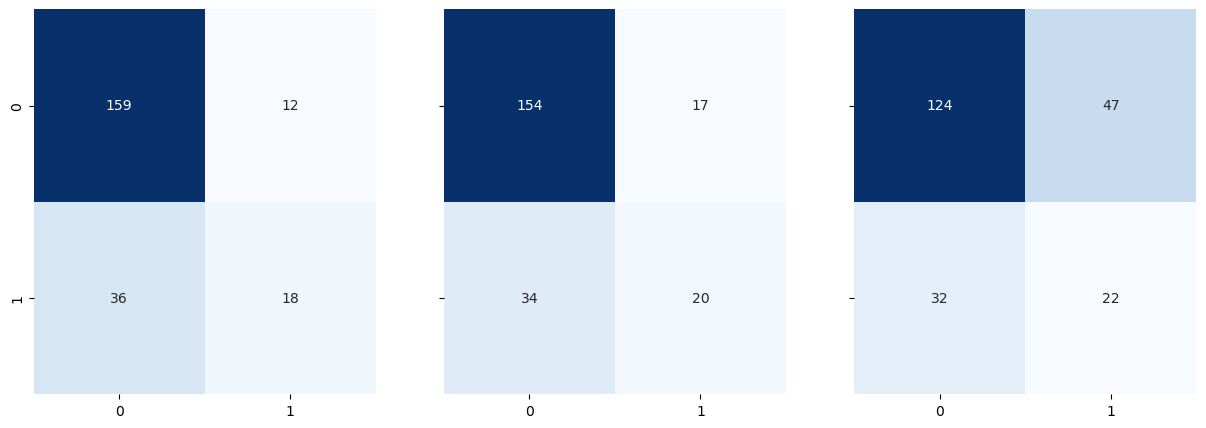

In [15]:
from sklearn.metrics import confusion_matrix

matrix_1=confusion_matrix(y_test,y_pred_1)
matrix_2=confusion_matrix(y_test,y_pred_2)
matrix_3=confusion_matrix(y_test,y_pred_3)


fig,ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 2)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 3)
sns.heatmap(matrix_3,annot=True, fmt='g', cbar=None,cmap="Blues");

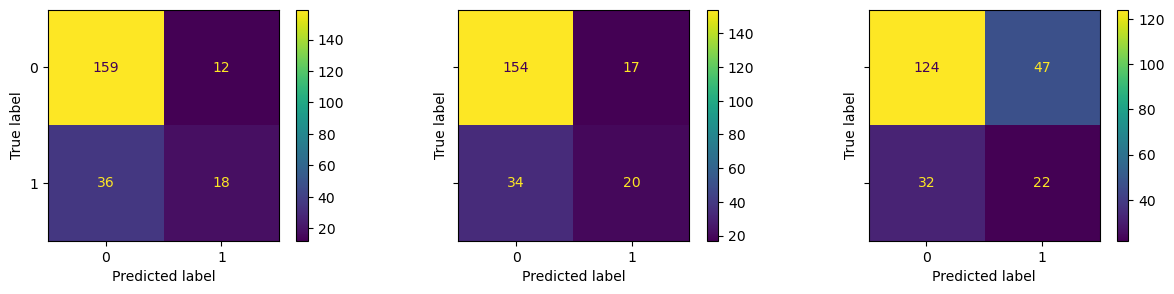

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,3))

ConfusionMatrixDisplay(matrix_1).plot(ax = ax1);
ConfusionMatrixDisplay(matrix_2).plot(ax = ax2);
ConfusionMatrixDisplay(matrix_3).plot(ax = ax3);

## отчет по решению задачи классификации

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_1))
print(classification_report(y_test, y_pred_2))
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       171
           1       0.60      0.33      0.43        54

    accuracy                           0.79       225
   macro avg       0.71      0.63      0.65       225
weighted avg       0.76      0.79      0.76       225

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       171
           1       0.54      0.37      0.44        54

    accuracy                           0.77       225
   macro avg       0.68      0.64      0.65       225
weighted avg       0.75      0.77      0.76       225

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       171
           1       0.32      0.41      0.36        54

    accuracy                           0.65       225
   macro avg       0.56      0.57      0.56       225
weighted avg       0.68      0.65      0.66       225



## отдельные метрики

In [20]:
from sklearn.metrics import recall_score, precision_score, f1_score

print('recall:    ', recall_score(y_test,  y_pred_3))
print('precision: ', precision_score(y_test,  y_pred_3))
print('f1:        ', f1_score(y_test,  y_pred_3))

recall:     0.4074074074074074
precision:  0.3188405797101449
f1:         0.35772357723577236


## построение ROC AUC

Построения графика ROC-AUC возможно эстиматора(оценщика модели)-`from_estimator` или предсказания - `from_predictions`

**Важное замечание!!!**
Внимание `RocCurveDisplay.from_predictions` **нельзя** брать результат команды `predict`, только результат `decision_function` или `predict_proba`, если этого нет, то команда не приненима!

In [22]:
pipe_1.predict_proba(X_test)[:10] # decision_function в Knn нет

array([[0.625     , 0.375     ],
       [0.33333333, 0.66666667],
       [0.875     , 0.125     ],
       [0.79166667, 0.20833333],
       [0.625     , 0.375     ],
       [0.95833333, 0.04166667],
       [0.45833333, 0.54166667],
       [0.95833333, 0.04166667],
       [0.54166667, 0.45833333],
       [0.79166667, 0.20833333]])

In [23]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, pipe_3.predict_proba(X_test)[:,1]))

0.5662768031189084


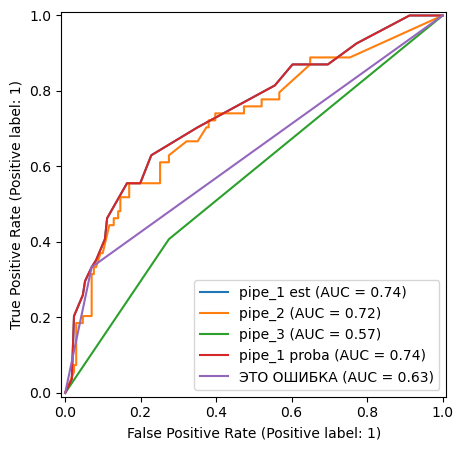

In [24]:
from sklearn.metrics import RocCurveDisplay
fig, ax_roc = plt.subplots(1,1, figsize=(10, 5))
RocCurveDisplay.from_estimator(pipe_1, X_test, y_test, ax = ax_roc, name = 'pipe_1 est');
RocCurveDisplay.from_estimator(pipe_2, X_test, y_test, ax = ax_roc, name = 'pipe_2');
RocCurveDisplay.from_estimator(pipe_3, X_test, y_test, ax = ax_roc, name = 'pipe_3');
RocCurveDisplay.from_predictions(y_test, pipe_1.predict_proba(X_test)[:,1], ax = ax_roc, name = 'pipe_1 proba');

RocCurveDisplay.from_predictions(y_test, y_pred_1, ax = ax_roc, name = 'ЭТО ОШИБКА')

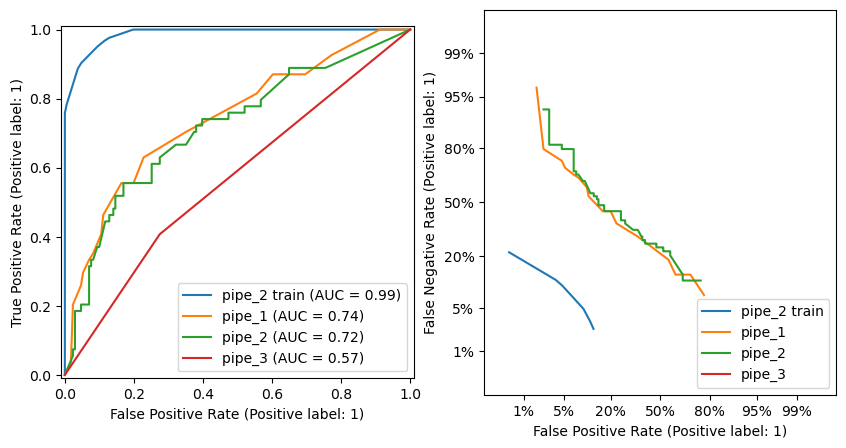

In [25]:
from sklearn.metrics import RocCurveDisplay, DetCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1,2, figsize=(10, 5))

RocCurveDisplay.from_estimator(pipe_2, X_train, y_train, ax = ax_roc, name = 'pipe_2 train');
RocCurveDisplay.from_estimator(pipe_1, X_test, y_test, ax = ax_roc, name = 'pipe_1');
RocCurveDisplay.from_estimator(pipe_2, X_test, y_test, ax = ax_roc, name = 'pipe_2');
RocCurveDisplay.from_estimator(pipe_3, X_test, y_test, ax = ax_roc, name = 'pipe_3');

DetCurveDisplay.from_estimator(pipe_2, X_train, y_train, ax = ax_det, name = 'pipe_2 train');
DetCurveDisplay.from_estimator(pipe_1, X_test, y_test, ax = ax_det, name = 'pipe_1');
DetCurveDisplay.from_estimator(pipe_2, X_test, y_test, ax = ax_det, name = 'pipe_2');
DetCurveDisplay.from_estimator(pipe_3, X_test, y_test, ax = ax_det, name = 'pipe_3');

**построение PR AUC**

Для построения PR AUC из эстиматора или предсказания, все аналогично ROC-AUC

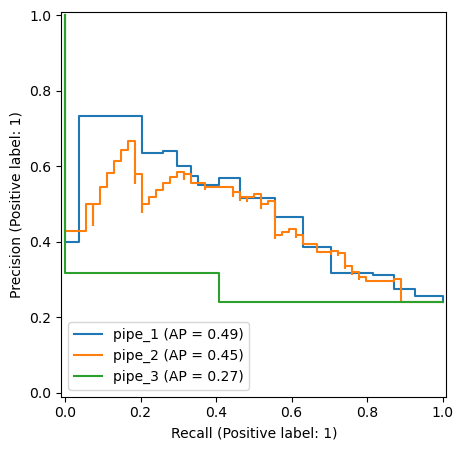

In [27]:
from sklearn.metrics import PrecisionRecallDisplay
fig, ax_pr = plt.subplots(1,1, figsize=(10, 5))

PrecisionRecallDisplay.from_estimator(pipe_1, X_test, y_test, ax = ax_pr, name = 'pipe_1');
PrecisionRecallDisplay.from_estimator(pipe_2, X_test, y_test, ax = ax_pr, name = 'pipe_2');
PrecisionRecallDisplay.from_estimator(pipe_3, X_test, y_test, ax = ax_pr, name = 'pipe_3');

**Заглянем под капот**

посмотрим на пороги (thresholds)

In [29]:
ths = pd.DataFrame({'predict':pipe_2.predict_proba(X_test)[:,1],
                    'true':y_test})
ths.sort_values(by='predict', ascending=False)

,predict,true
72,1.0,1
175,1.0,0
153,1.0,0
191,1.0,1
73,1.0,0
...,...,...
147,0.0,0
192,0.0,0
46,0.0,0
143,0.0,0


In [30]:
ths.value_counts(['predict']).sort_index(ascending=False)

predict 
1.000000     7
0.746537     1
0.729000     1
0.720248     1
0.713593     1
            ..
0.042820     1
0.037085     2
0.034930     1
0.030761     1
0.000000    48
Name: count, Length: 125, dtype: int64

позиция порога 0.5 -  14
в позиции 22 для ROC
fpr:     0.170  tpr:        0.556  thresholds:,0.368
recall:  0.556  precision:, 0.508  thresholds:,0.368


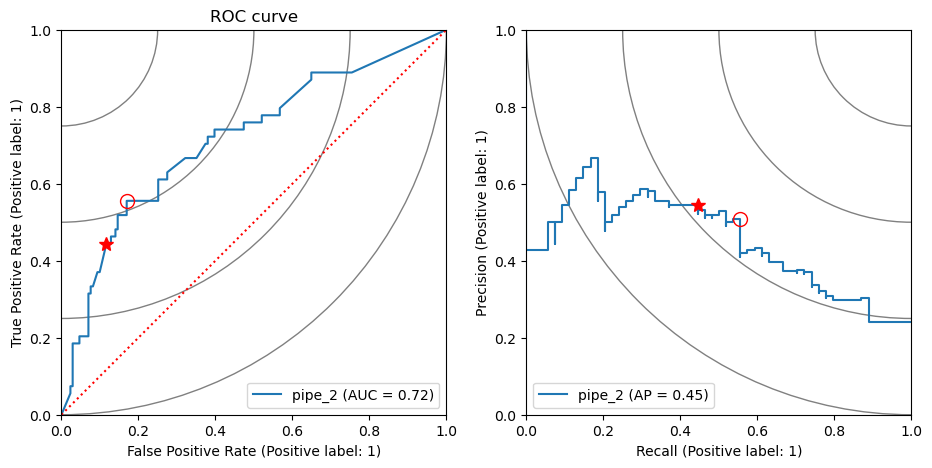

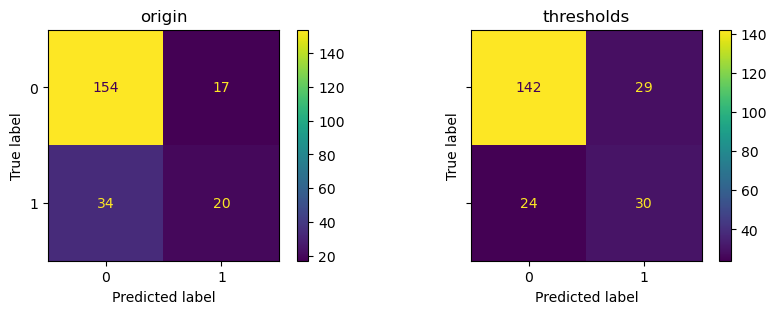

,precision,recall,f1-score,support
0,0.819149,0.900585,0.857939,171.000000
1,0.540541,0.370370,0.439560,54.000000
accuracy,0.773333,0.773333,0.773333,0.773333
macro avg,0.679845,0.635478,0.648750,225.000000
weighted avg,0.752283,0.773333,0.757528,225.000000
,precision,recall,f1-score,support
0,0.855422,0.830409,0.842730,171.000000
1,0.508475,0.555556,0.530973,54.000000
accuracy,0.764444,0.764444,0.764444,0.764444
macro avg,0.681948,0.692982,0.686852,225.000000


In [31]:
# фунция нахождения ближайшего индекса в упорядоченном списке
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test, pipe_2.predict_proba(X_test)[:,1], pos_label = None)
#######################################################
pos = 22 # зададим порог (2) (21, 61)
point = find_nearest(thresholds,0.5) # найдем позицию порога вероятности 0.5
#######################################################
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(11, 5))

RocCurveDisplay.from_estimator(pipe_2, X_test, y_test, name = 'pipe_2', ax=ax1)
ax1.set_title("ROC curve")
ax1.plot([0,1],[0,1], color="r", ls=":")
ax1.plot(fpr[point],tpr[point], '*', markersize=10, color="r")
ax1.plot(fpr[pos],tpr[pos], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((0, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((0, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((0, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((0, 1), 1, color='gray',fill=False)
ax1.add_patch(circle0)
ax1.add_patch(circle1)
ax1.add_patch(circle2)
ax1.add_patch(circle3)
ax1.set_xlim((0, 1))
ax1.set_ylim((0, 1))

precision, recall, thresholds_pr = precision_recall_curve(y_test, pipe_2.predict_proba(X_test)[:,1], pos_label = None)
PrecisionRecallDisplay.from_estimator(pipe_2, X_test, y_test, name = 'pipe_2', ax=ax2)
point_pr = find_nearest(thresholds_pr,0.5)  # найдем позицию порога вероятности 0.5
pos_pr = find_nearest(thresholds_pr,thresholds[pos]) # найдем позицию порога для thresholds в позиции pos

ax2.plot(recall[point_pr],precision[point_pr], '*', markersize=10, color="r")
ax2.plot(recall[pos_pr],precision[pos_pr], 'o', markersize=10,  mfc='none', color="r");
circle0 = plt.Circle((1, 1), 0.25, color='gray',fill=False)
circle1 = plt.Circle((1, 1), 0.5, color='gray',fill=False)
circle2 = plt.Circle((1, 1), 0.75, color='gray',fill=False)
circle3 = plt.Circle((1, 1), 1, color='gray',fill=False)
ax2.add_patch(circle0)
ax2.add_patch(circle1)
ax2.add_patch(circle2)
ax2.add_patch(circle3)
ax2.set_xlim((0, 1))
ax2.set_ylim((0, 1))

print( 'позиция порога 0.5 - ', point)
print( 'в позиции', pos, 'для ROC')
print( f'fpr:     {fpr[pos]:.3f}',       f' tpr:        {tpr[pos]:.3f}',          f' thresholds:,{thresholds[pos]:.3f}')
print( f'recall:  {recall[pos_pr]:.3f}', f' precision:, {precision[pos_pr]:.3f}', f' thresholds:,{thresholds[pos]:.3f}')


y_thresholds = np.where(pipe_2.predict_proba(X_test)[:,1]>=thresholds[pos], 1, 0)

matrix_thresholds = confusion_matrix(y_test, y_thresholds)

fig, [ax1, ax2] = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,3))

ConfusionMatrixDisplay(matrix_2).plot(ax = ax1);
ax1.title.set_text("origin")
ConfusionMatrixDisplay(matrix_thresholds).plot(ax = ax2);
ax2.title.set_text("thresholds")
plt.show()


from IPython.display import display_html

df1 = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True)).T
df2 = pd.DataFrame(classification_report(y_test, y_thresholds, output_dict=True)).T

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('origin')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('thresholds')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)